In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("scrapped_book_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     940 non-null    object 
 1   Price(£)      940 non-null    float64
 2   Rating        940 non-null    int64  
 3   Stock_Status  940 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 23.1+ KB


In [6]:
book_cnt_gp=df.groupby("Rating")["Price(£)"].agg(["sum","min","max","count","mean"])
book_cnt_gp

,sum,min,max,count,mean
Rating,,,,,
1,7222.56,10.40,59.64,212,34.068679
2,6442.17,10.02,59.95,186,34.635323
3,6558.47,10.16,59.99,188,34.885479
4,6170.04,10.01,59.45,169,36.509112
5,6544.36,10.00,59.92,185,35.374919


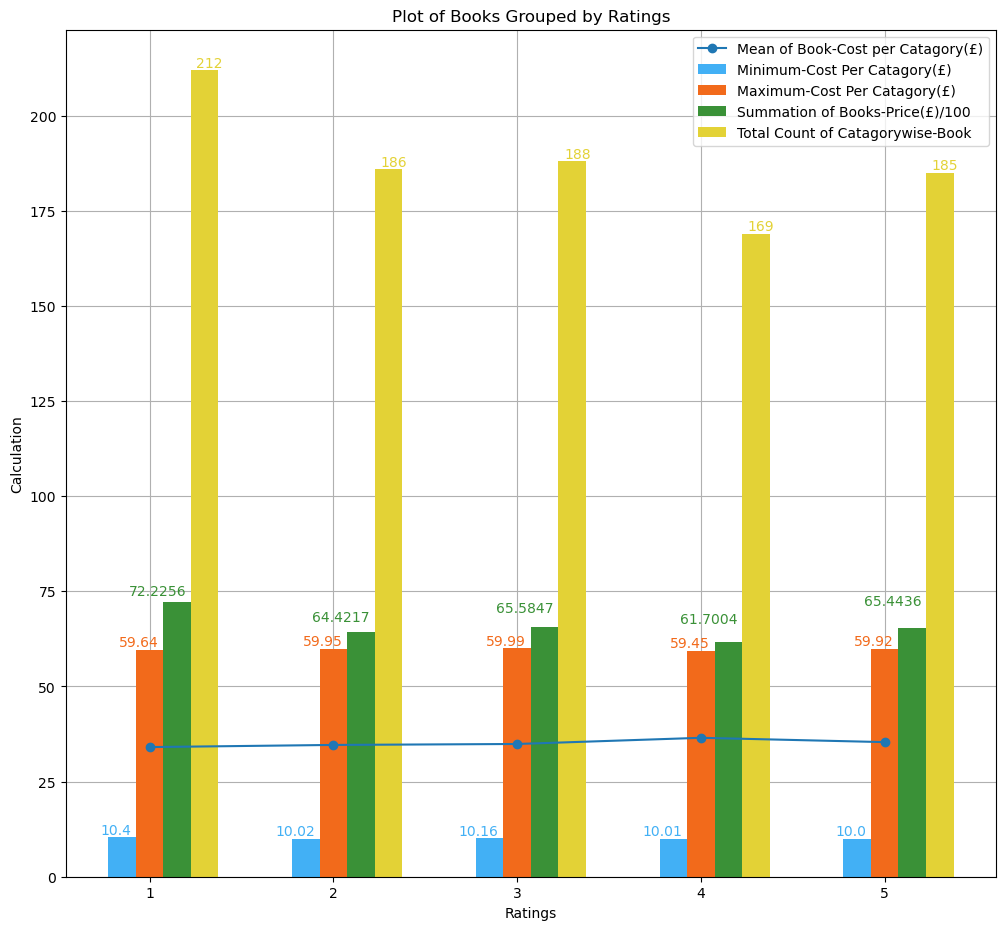

In [12]:
plt.figure(figsize=(12,11))
minm=np.array(book_cnt_gp["min"])
maxm=np.array(book_cnt_gp["max"])
sumtn=np.array(book_cnt_gp["sum"]/100)
cnt=np.array(book_cnt_gp["count"])
means=np.array(book_cnt_gp["mean"])
idx=(np.arange(len(book_cnt_gp.index)))+1
width=0.15

plt.bar((idx)-(width),minm,width,label="Minimum-Cost Per Catagory(£)",zorder=2,color="#42b0f5")
i1=0
while i1 < (len(minm)):
    plt.text(idx[i1]-0.1,minm[i1],str(minm[i1]),ha="right",va="bottom",color="#42b0f5")
    i1+=1
    
plt.bar((idx),maxm,width,label="Maximum-Cost Per Catagory(£)",zorder=2,color="#f26a1b")
i2=0
while i2 < (len(maxm)):
    plt.text(idx[i2]+0.05,maxm[i2],str(maxm[i2]),ha="right",va="bottom",color="#f26a1b")
    i2+=1
    
plt.bar((idx)+(width),sumtn,width,label="Summation of Books-Price(£)/100",zorder=2,color="#3a9137")
i3=0
while i3 < (len(sumtn)):
    plt.text(idx[i3]+0.2,sumtn[i3]+idx[i3],str(sumtn[i3]),ha="right",va="bottom",color="#3a9137")
    i3+=1

plt.bar((idx)+(width*2),cnt,width,label="Total Count of Catagorywise-Book",zorder=2,color="#e3d236")
i4=0
while i4 < (len(cnt)):
    plt.text(idx[i4]+0.4,cnt[i4],str(cnt[i4]),ha="right",va="bottom",color="#e3d236")
    i4+=1

plt.plot((idx),means,label="Mean of Book-Cost per Catagory(£)",zorder=3,linestyle="-",marker="o")

plt.xlabel("Ratings")
plt.ylabel("Calculation")
plt.title("Plot of Books Grouped by Ratings")
plt.grid()
plt.legend()
plt.xticks(book_cnt_gp.index,idx)
plt.show()